In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

### Data Loading

In [2]:
#Loading the dataset

original_dataset = pd.read_csv("C:/Users/fetih.kaya/Desktop/EuropeanSales.csv")
dataset = original_dataset.copy()

dataset.head(10)

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935
5,Finland,5.3,51.32,9.9,6.3,372,1971
6,France,61.9,44.51,10.0,5.7,96,5929
7,Germany,82.5,44.45,9.1,4.6,83,6824
8,Greece,11.2,31.67,9.9,3.9,73,813
9,Hungary,10.0,15.41,7.3,5.1,45,449


### Explanatory Data Analysis

In [3]:
#General information about the dataset

dataset.info()

#The dataset has; 
#6 numerical and 1 categorical in total 7 columns
#21 rows
#There is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
Country              21 non-null object
Population           21 non-null float64
GDPperHead           21 non-null float64
UnemploymentRate     21 non-null float64
EducationSpending    21 non-null float64
SalesPerCapita       21 non-null int64
ComputerSales        21 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [4]:
#Statistical summary of the dataset

dataset.describe()

#Computer sales has high standart deviation as it seen the histogram graph below

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.723810,36.973810,8.100000,5.180952,115.333333,2492.809524
std,26.128929,18.654496,3.122979,1.269889,78.970459,2499.807965
min,4.400000,6.550000,3.600000,3.300000,20.000000,154.000000
25%,8.400000,20.670000,6.300000,4.400000,68.000000,813.000000
50%,10.700000,43.540000,7.300000,5.000000,101.000000,1682.000000
75%,44.800000,51.320000,9.900000,5.800000,151.000000,2879.000000
max,82.500000,64.430000,14.400000,8.400000,372.000000,9887.000000


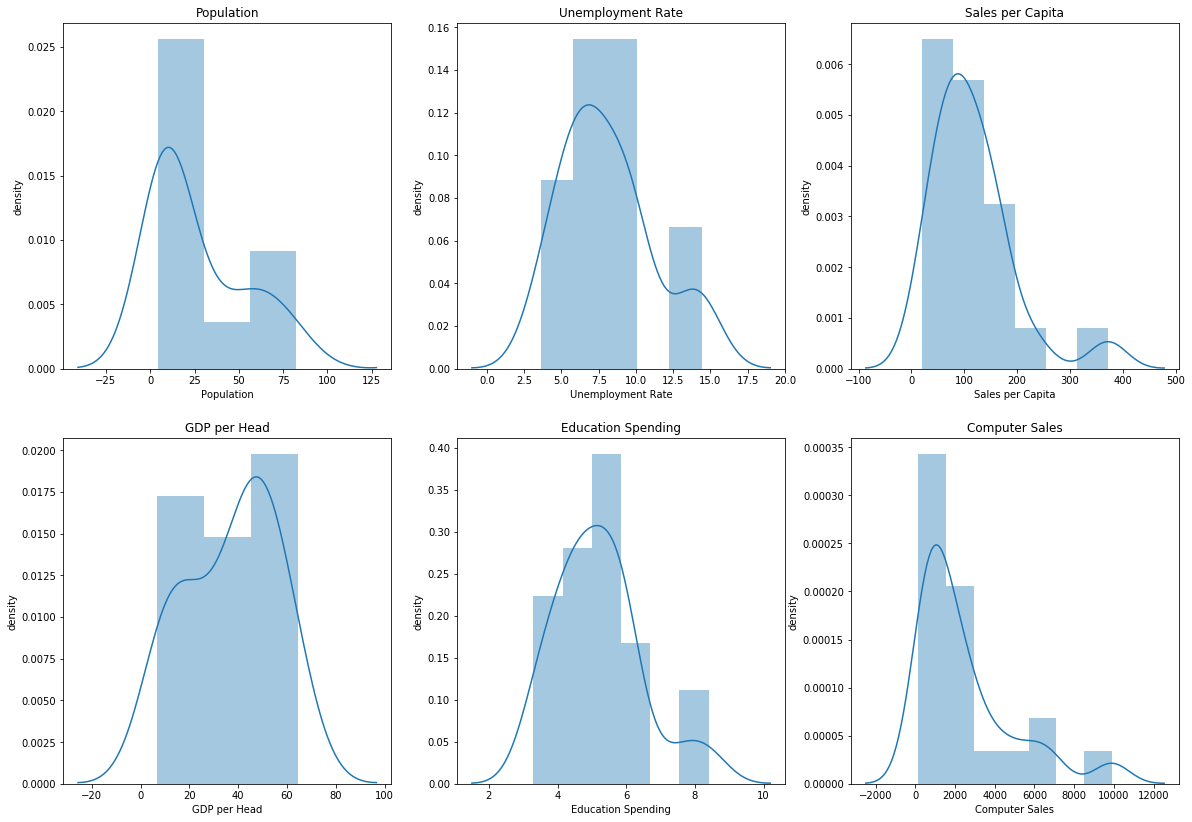

In [5]:
#Distribution of entries in accordance with attributes

f, ax = plt.subplots(2,3)
f.set_size_inches(20,14)

sns.distplot(dataset.Population.sort_values(), ax = ax[0,0]); ax[0,0].set_xlabel('Population'); ax[0,0].set_ylabel('density');
sns.distplot(dataset.GDPperHead.sort_values(), ax = ax[1,0]); ax[1,0].set_xlabel('GDP per Head'); ax[1,0].set_ylabel('density');
sns.distplot(dataset.UnemploymentRate.sort_values(), ax = ax[0,1]); ax[0,1].set_xlabel('Unemployment Rate'); ax[0,1].set_ylabel('density');
sns.distplot(dataset.EducationSpending.sort_values(), ax = ax[1,1]); ax[1,1].set_xlabel('Education Spending'); ax[1,1].set_ylabel('density');
sns.distplot(dataset.SalesPerCapita.sort_values(), ax = ax[0,2]); ax[0,2].set_xlabel('Sales per Capita'); ax[0,2].set_ylabel('density');
sns.distplot(dataset.ComputerSales.sort_values(), ax = ax[1,2]); ax[1,2].set_xlabel('Computer Sales'); ax[1,2].set_ylabel('density');


ax[0,0].set_title('Population');
ax[0,1].set_title('Unemployment Rate');
ax[0,2].set_title('Sales per Capita');
ax[1,0].set_title('GDP per Head');
ax[1,1].set_title('Education Spending');
ax[1,2].set_title('Computer Sales');

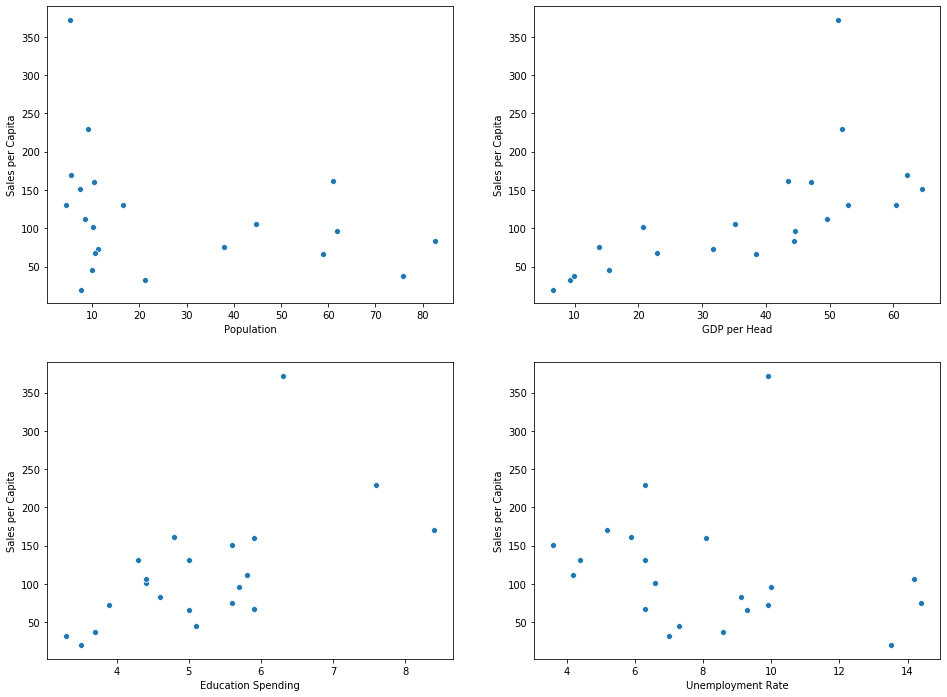

In [6]:
#Relationship of attributes with Sales per Capita

f, ax = plt.subplots(2,2)
f.set_size_inches(16,12)

sns.scatterplot(y="SalesPerCapita", x="Population", data= dataset, ax = ax[0,0]); ax[0,0].set_xlabel('Population');ax[0,0].set_ylabel('Sales per Capita');
sns.scatterplot(y="SalesPerCapita", x="GDPperHead", data= dataset, ax = ax[0,1]); ax[0,1].set_xlabel('GDP per Head'); ax[0,1].set_ylabel('Sales per Capita');
sns.scatterplot(y="SalesPerCapita", x="EducationSpending", data= dataset, ax = ax[1,0]); ax[1,0].set_xlabel('Education Spending'); ax[1,0].set_ylabel('Sales per Capita');
sns.scatterplot(y="SalesPerCapita", x="UnemploymentRate", data= dataset, ax = ax[1,1]); ax[1,1].set_xlabel('Unemployment Rate'); ax[1,1].set_ylabel('Sales per Capita');


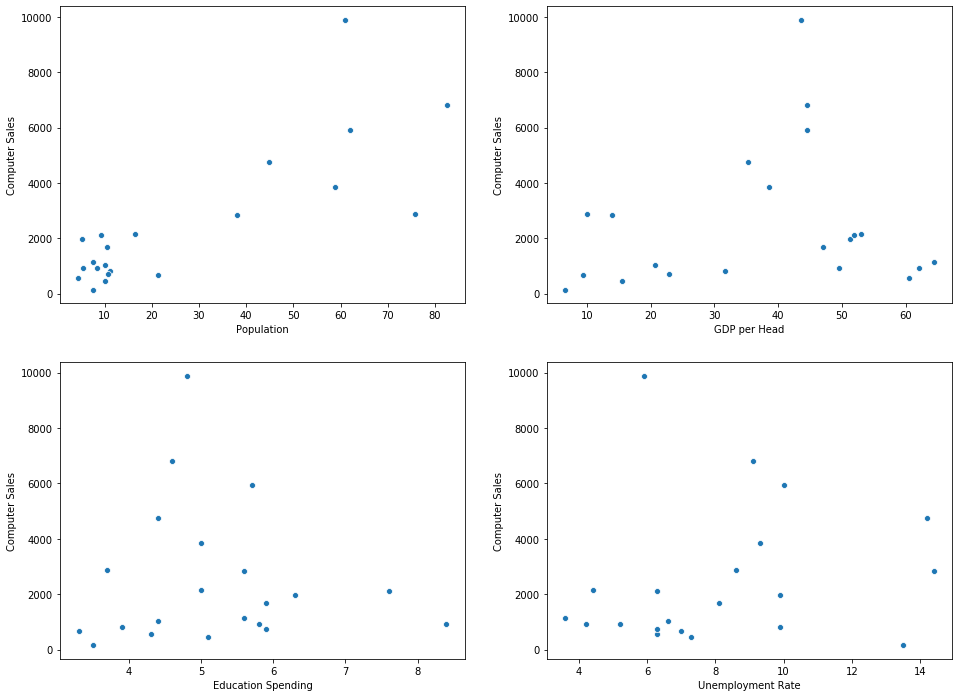

In [7]:
#Relationship of attributes with Computer Sales

f, ax = plt.subplots(2,2)
f.set_size_inches(16,12)

sns.scatterplot(y="ComputerSales", x="Population", data= dataset, ax = ax[0,0]); ax[0,0].set_xlabel('Population');ax[0,0].set_ylabel('Computer Sales');
sns.scatterplot(y="ComputerSales", x="GDPperHead", data= dataset, ax = ax[0,1]); ax[0,1].set_xlabel('GDP per Head'); ax[0,1].set_ylabel('Computer Sales');
sns.scatterplot(y="ComputerSales", x="EducationSpending", data= dataset, ax = ax[1,0]); ax[1,0].set_xlabel('Education Spending'); ax[1,0].set_ylabel('Computer Sales');
sns.scatterplot(y="ComputerSales", x="UnemploymentRate", data= dataset, ax = ax[1,1]); ax[1,1].set_xlabel('Unemployment Rate'); ax[1,1].set_ylabel('Computer Sales');


### Data Preprocessing

##### Duplicated Entries

In [8]:
#Duplicated data search

dataset.duplicated().value_counts()

#There is no duplicated data entries

False    21
dtype: int64

##### Outliers

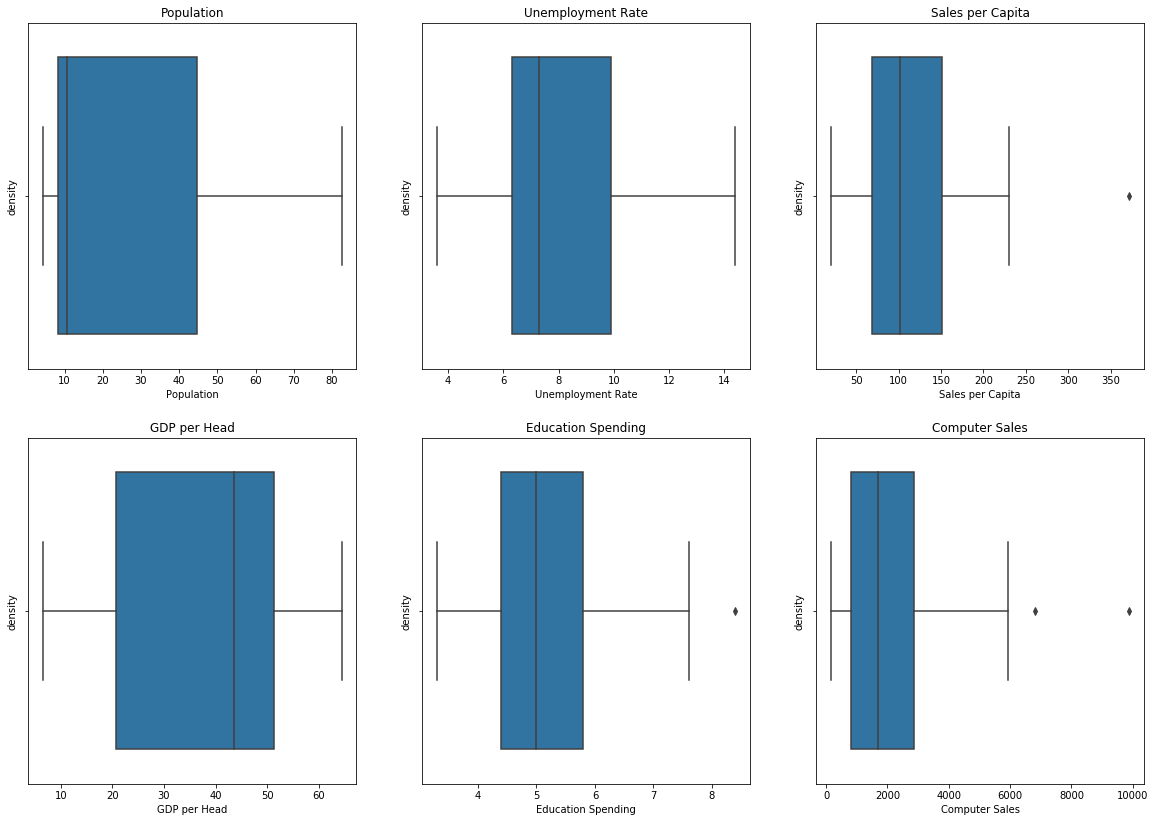

In [9]:
#Visualizing outliers

f, ax = plt.subplots(2,3)
f.set_size_inches(20,14)

sns.boxplot(dataset.Population.sort_values(), ax = ax[0,0]); ax[0,0].set_xlabel('Population'); ax[0,0].set_ylabel('density');
sns.boxplot(dataset.GDPperHead.sort_values(), ax = ax[1,0]); ax[1,0].set_xlabel('GDP per Head'); ax[1,0].set_ylabel('density');
sns.boxplot(dataset.UnemploymentRate.sort_values(), ax = ax[0,1]); ax[0,1].set_xlabel('Unemployment Rate'); ax[0,1].set_ylabel('density');
sns.boxplot(dataset.EducationSpending.sort_values(), ax = ax[1,1]); ax[1,1].set_xlabel('Education Spending'); ax[1,1].set_ylabel('density');
sns.boxplot(dataset.SalesPerCapita.sort_values(), ax = ax[0,2]); ax[0,2].set_xlabel('Sales per Capita'); ax[0,2].set_ylabel('density');
sns.boxplot(dataset.ComputerSales.sort_values(), ax = ax[1,2]); ax[1,2].set_xlabel('Computer Sales'); ax[1,2].set_ylabel('density');


ax[0,0].set_title('Population');
ax[0,1].set_title('Unemployment Rate');
ax[0,2].set_title('Sales per Capita');
ax[1,0].set_title('GDP per Head');
ax[1,1].set_title('Education Spending');
ax[1,2].set_title('Computer Sales');


In [10]:
#Removing outliers

#For 'Population' attribute

Q1 = dataset.Population.quantile(q=0.25)
Q3 = dataset.Population.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['Population'] > minimum) & (dataset['Population'] < maximum)]

#For 'GDPperHead' attribute

Q1 = dataset.GDPperHead.quantile(q=0.25)
Q3 = dataset.GDPperHead.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['GDPperHead'] > minimum) & (dataset['GDPperHead'] < maximum)]

#For 'UnemploymentRate' attribute

Q1 = dataset.UnemploymentRate.quantile(q=0.25)
Q3 = dataset.UnemploymentRate.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['UnemploymentRate'] > minimum) & (dataset['UnemploymentRate'] < maximum)]

#For 'EducationSpending' attribute

Q1 = dataset.EducationSpending.quantile(q=0.25)
Q3 = dataset.EducationSpending.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['EducationSpending'] > minimum) & (dataset['EducationSpending'] < maximum)]

#For 'SalesPerCapita' attribute

Q1 = dataset.SalesPerCapita.quantile(q=0.25)
Q3 = dataset.SalesPerCapita.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['SalesPerCapita'] > minimum) & (dataset['SalesPerCapita'] < maximum)]

#For 'ComputerSales' attribute

Q1 = dataset.ComputerSales.quantile(q=0.25)
Q3 = dataset.ComputerSales.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['ComputerSales'] > minimum) & (dataset['ComputerSales'] < maximum)]

print(Q1)
print(Q3)
print(IQR)
print(maximum)

dataset = dataset.reset_index(drop=True)
dataset


#After removing outliers, there are 18 rows remaining 

771.0
3368.5
2597.5
7264.75


,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,France,61.9,44.51,10.0,5.7,96,5929
5,Germany,82.5,44.45,9.1,4.6,83,6824
6,Greece,11.2,31.67,9.9,3.9,73,813
7,Hungary,10.0,15.41,7.3,5.1,45,449
8,Ireland,4.4,60.46,6.3,4.3,131,577
9,Italy,58.9,38.49,9.3,5.0,66,3858


In [11]:
#Removing non numeric attributes from the dataset to prepare it regression model

dataset = dataset.drop(['Country'], axis=1) 

##### Correlation

(6, 0)

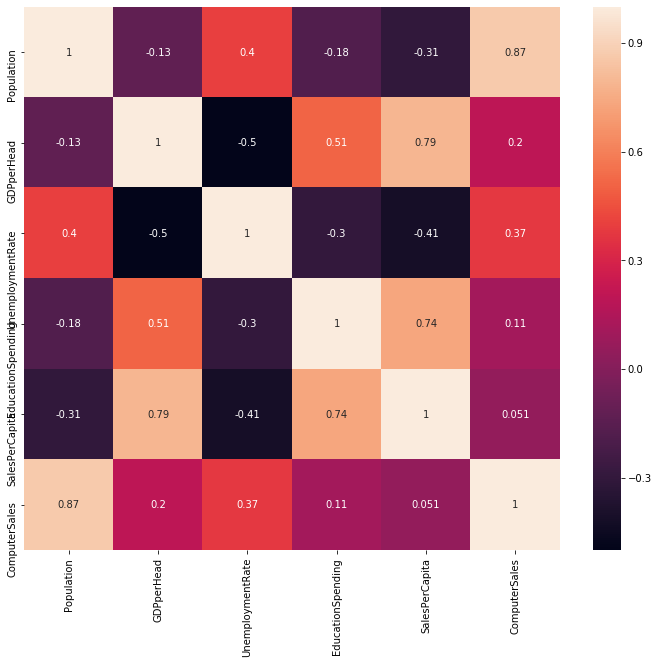

In [12]:
#Correlation search between independent and taget variables (SalesPerCapita & ComputerSales)

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(dataset.corr(), annot=True)
ax.set_ylim(6, 0)


#Sales per Capita is positively correlated with GDPperHead and EducationalSpendings and the correlation coefficients 
#are high while it is negatively correlated with UnemploymentRate and  Population and the correlation coefficients are 
#neither high nor low

#Computer Sales is positively correlated with all the attributes and the correlation coefficient of Population is 
#very high while the others middle or low

In [13]:
#Correlation and p-values for Sales per Capita target variable

attributes = []
cor_values = []
p_values = []

for i in range(len(dataset.columns)):
    attributes.append(dataset.columns[i])
    cor_val, p_val = stats.pearsonr(dataset.iloc[:,i], dataset.loc[:,'SalesPerCapita'])
    cor_values.append(cor_val)
    p_values.append(p_val)

df1 = pd.DataFrame(attributes, columns = ["Attributes"])
df2 = pd.DataFrame(cor_values, columns = ["Pearson Corr."])
df3 = pd.DataFrame(p_values, columns = ["P-Values"])

df2 = df2.abs()

df  = pd.concat([df1,df2,df3], axis=1)
df  = df.sort_values(["Pearson Corr."], ascending = False)
df  = df.reset_index(drop=True)

df

#It seems UnemploymentRate, Population and ComputeSales attributes do not have statistical significance because 
#their p-values are higher than 5%  

,Attributes,Pearson Corr.,P-Values
0,SalesPerCapita,1.000000,0.000000
1,GDPperHead,0.794296,0.000083
2,EducationSpending,0.736201,0.000495
3,UnemploymentRate,0.412963,0.088518
4,Population,0.305421,0.217771
5,ComputerSales,0.051201,0.840101


In [14]:
#Correlation and p-values for Computer Sales target variable

attributes = []
cor_values = []
p_values = []

for i in range(len(dataset.columns)):
    attributes.append(dataset.columns[i])
    cor_val, p_val = stats.pearsonr(dataset.iloc[:,i], dataset.loc[:,'ComputerSales'])
    cor_values.append(cor_val)
    p_values.append(p_val)

df1 = pd.DataFrame(attributes, columns = ["Attributes"])
df2 = pd.DataFrame(cor_values, columns = ["Pearson Corr."])
df3 = pd.DataFrame(p_values, columns = ["P-Values"])

df2 = df2.abs()

df  = pd.concat([df1,df2,df3], axis=1)
df  = df.sort_values(["Pearson Corr."], ascending = False)
df  = df.reset_index(drop=True)

df

#It seems UnemploymentRate, GDPperHead, EducatinSpending and SalesPerCapita attributes do not have statistical significance 
#because their p-values are higher than 5%  

,Attributes,Pearson Corr.,P-Values
0,ComputerSales,1.000000,0.000000
1,Population,0.869913,0.000003
2,UnemploymentRate,0.373540,0.126782
3,GDPperHead,0.200600,0.424791
4,EducationSpending,0.108389,0.668573
5,SalesPerCapita,0.051201,0.840101


### Data Modelling

In [15]:
#Defining Adjusted R-Squared

def adjustedr2(r2,p,n):
    return 1 - (1-r2)*(n-1)/(n-p-1)

##### Modelling for Sales per Capita

##### Model 1

In [16]:
#Splitting dataset into train and test sets

x = dataset.drop(['SalesPerCapita','ComputerSales'], axis=1)
y = dataset.SalesPerCapita

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [17]:
LR = linear_model.LinearRegression()
model = LR.fit(x_train, y_train)

preds = model.predict(x_test)

print("R-squared : ", float(format(r2_score(y_test,preds), '.3f')))
print("Adj.R-squared : ", float(format(adjustedr2(r2_score(y_test,preds), x.shape[1], x.shape[0]), '.3f')))
print("RMSE : ", float(format(np.sqrt(metrics.mean_squared_error(y_test,preds)),'.3f')))

R-squared :  0.401
Adj.R-squared :  0.217
RMSE :  41.083


##### Model 2



In [18]:
#Splitting dataset into train and test sets

x = dataset.drop(['SalesPerCapita','ComputerSales','Population','UnemploymentRate'], axis=1)
y = dataset.SalesPerCapita

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
LR = linear_model.LinearRegression()
model = LR.fit(x_train, y_train)

preds = model.predict(x_test)

print("R-squared : ", float(format(r2_score(y_test,preds), '.3f')))
print("Adj.R-squared : ", float(format(adjustedr2(r2_score(y_test,preds), x.shape[1], x.shape[0]), '.3f')))
print("RMSE : ", float(format(np.sqrt(metrics.mean_squared_error(y_test,preds)),'.3f')))

R-squared :  0.423
Adj.R-squared :  0.346
RMSE :  22.012


Model 2 gave better results for Sales per Capita prediction. Model 2 uses only highly correlated attributes with Sales per Capita which are GDPperHead and EducationSpending.

Model 1 uses all 4 attributes Population, UnemploymentRate, GDPperHead and EducationSpending for prediction but it gaves worse results than Model 2.

In Model 2;
-R-squared value is higher
-Adj. R-squared value is closer to R-squared value
-RMSE score is less

##### Modelling for Computer Sales 

##### Model 1

In [20]:
#Splitting dataset into train and test sets

x = dataset.drop(['SalesPerCapita','ComputerSales'], axis=1)
y = dataset.ComputerSales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
LR = linear_model.LinearRegression()
model = LR.fit(x_train, y_train)

preds = model.predict(x_test)

print("R-squared : ", float(format(r2_score(y_test,preds), '.3f')))
print("Adj.R-squared : ", float(format(adjustedr2(r2_score(y_test,preds), x.shape[1], x.shape[0]), '.3f')))
print("RMSE : ", float(format(np.sqrt(metrics.mean_squared_error(y_test,preds)),'.3f')))

R-squared :  0.9
Adj.R-squared :  0.87
RMSE :  503.212


##### Model 2

In [22]:
#Splitting dataset into train and test sets

x = dataset.drop(['SalesPerCapita','ComputerSales','EducationSpending', 'GDPperHead','UnemploymentRate'], axis=1)
y = dataset.ComputerSales

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
LR = linear_model.LinearRegression()
model = LR.fit(x_train, y_train)

preds = model.predict(x_test)

print("R-squared : ", float(format(r2_score(y_test,preds), '.3f')))
print("Adj.R-squared : ", float(format(adjustedr2(r2_score(y_test,preds), x.shape[1], x.shape[0]), '.3f')))
print("RMSE : ", float(format(np.sqrt(metrics.mean_squared_error(y_test,preds)),'.3f')))

R-squared :  0.771
Adj.R-squared :  0.757
RMSE :  632.371


Model 1 gave better results for Computer Sales prediction. Model 1 uses all 4 attributes which are Population, UnemploymentRate, GDPperHead and EducationSpending for prediction.

Model 2 uses only highly correlated attribute with Computer Sales which is Population for prediction but it gaves worse results than Model 1.

In Model 1;
-R-squared value is higher
-Difference between Adj. R-squared value and R-squared value is a bit higher
-RMSE score is less

##### For modelling "Sales per Capita" dependent variable; all attributes used model, Model 1, gave poor R-Squared, Adj. R-squared and RMSE scores compared with Model 2. In Model 2, statistically significant and highly correlated attributes with "Sales per Capita" attribute were used and so that the prediction results are more accurate then Model 1.

##### For modellng "Computer Sales" dependent variable; all attributes used model, Model 2, gave poor  R-Squared, Adj. R-squared and RMSE scores compared with Model 1. In Model 1,  statistically significant and highly correlated attributes with "Computer Sales" attribute were used and so that the prediction results are more accurate then Model 2.